In [1]:
library(fpp3)

── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──

✔ tibble      3.2.1     ✔ tsibble     1.1.3
✔ dplyr       1.1.3     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.0     ✔ feasts      0.3.1
✔ lubridate   1.9.3     ✔ fable       0.3.3
✔ ggplot2     3.4.3     ✔ fabletools  0.3.4

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



In [ ]:
# few tid bits

# The forecast vaiable y is sometimes also called the regressand, dependent or explained variable. The predictor variables like x are sometimes are also called teh regressors, independent or expalnatory variables. In this book we will always refer to them as the "forecast " variable and "predictor" variables.

# The coefficient b0 and b1 denote the intercept and the slope of the line respectively. The intercept b- represents the predicted value of y when x = 0. The slope b1 represents the average predicted change in y resulting from a one unit increase in x



In [3]:
options(repr.plot.width = 20, repr.plot.height = 10)

[[1]]

$y
[1] "% change"

attr(,"class")
[1] "labels"

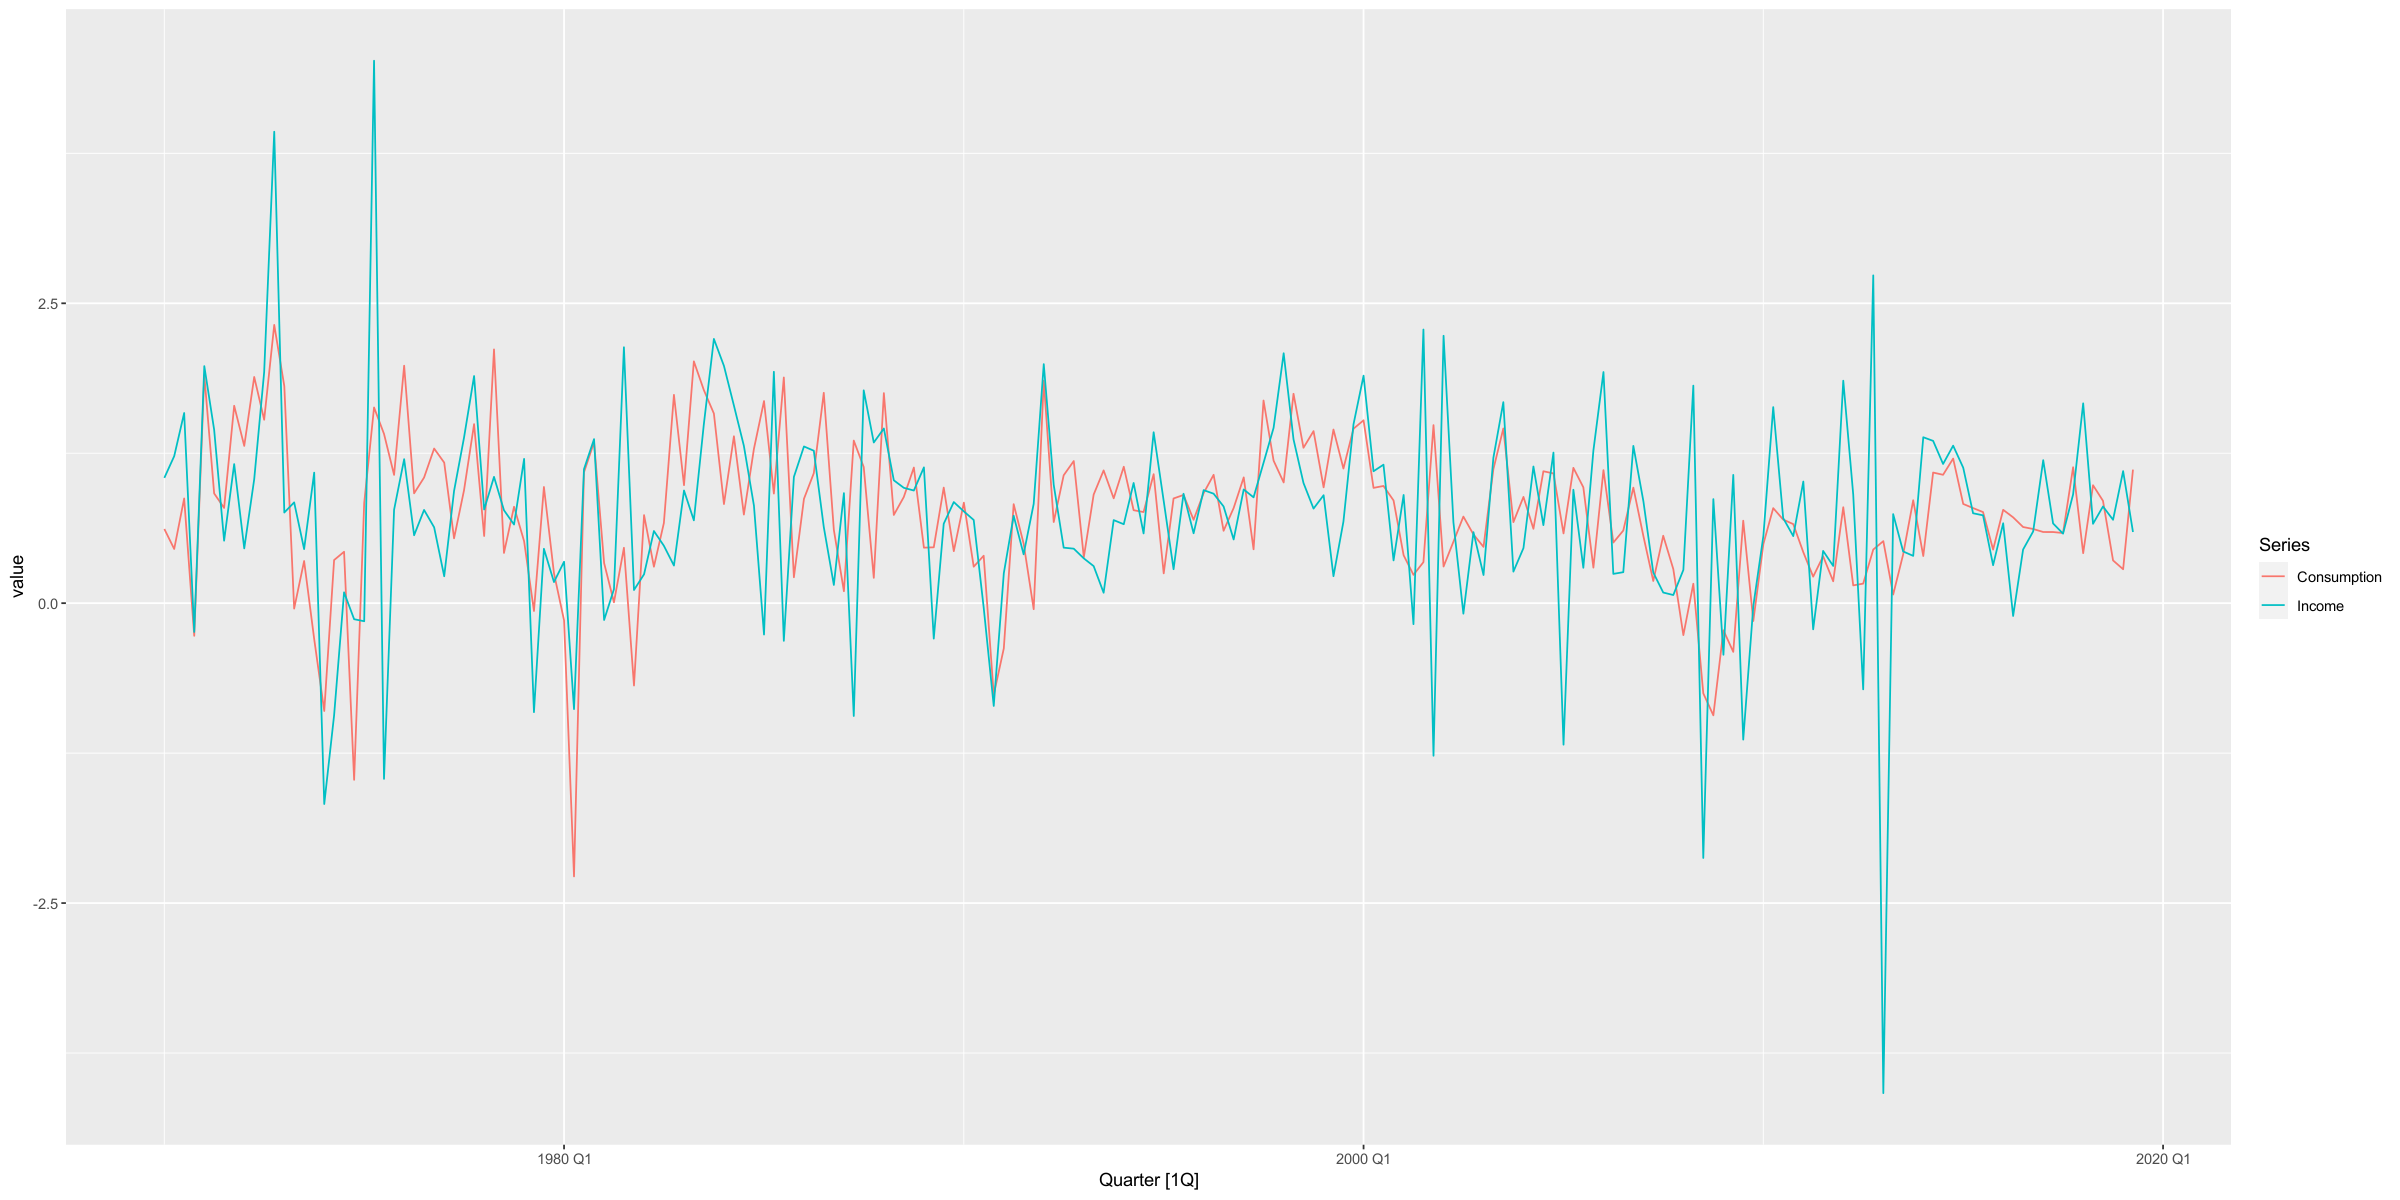

In [4]:
# Example: US consumption expenditure

# tiem series of quarterly percentage changes (growth rates) of real personal consumption expenditure, y and real personal disposable income, x for the US from 1970 Q1 to 2019 Q2


us_change |> pivot_longer(c(Consumption, Income), names_to = "Series") |> autoplot(value) |> labs(y = "% change")

`geom_smooth()` using formula = 'y ~ x'


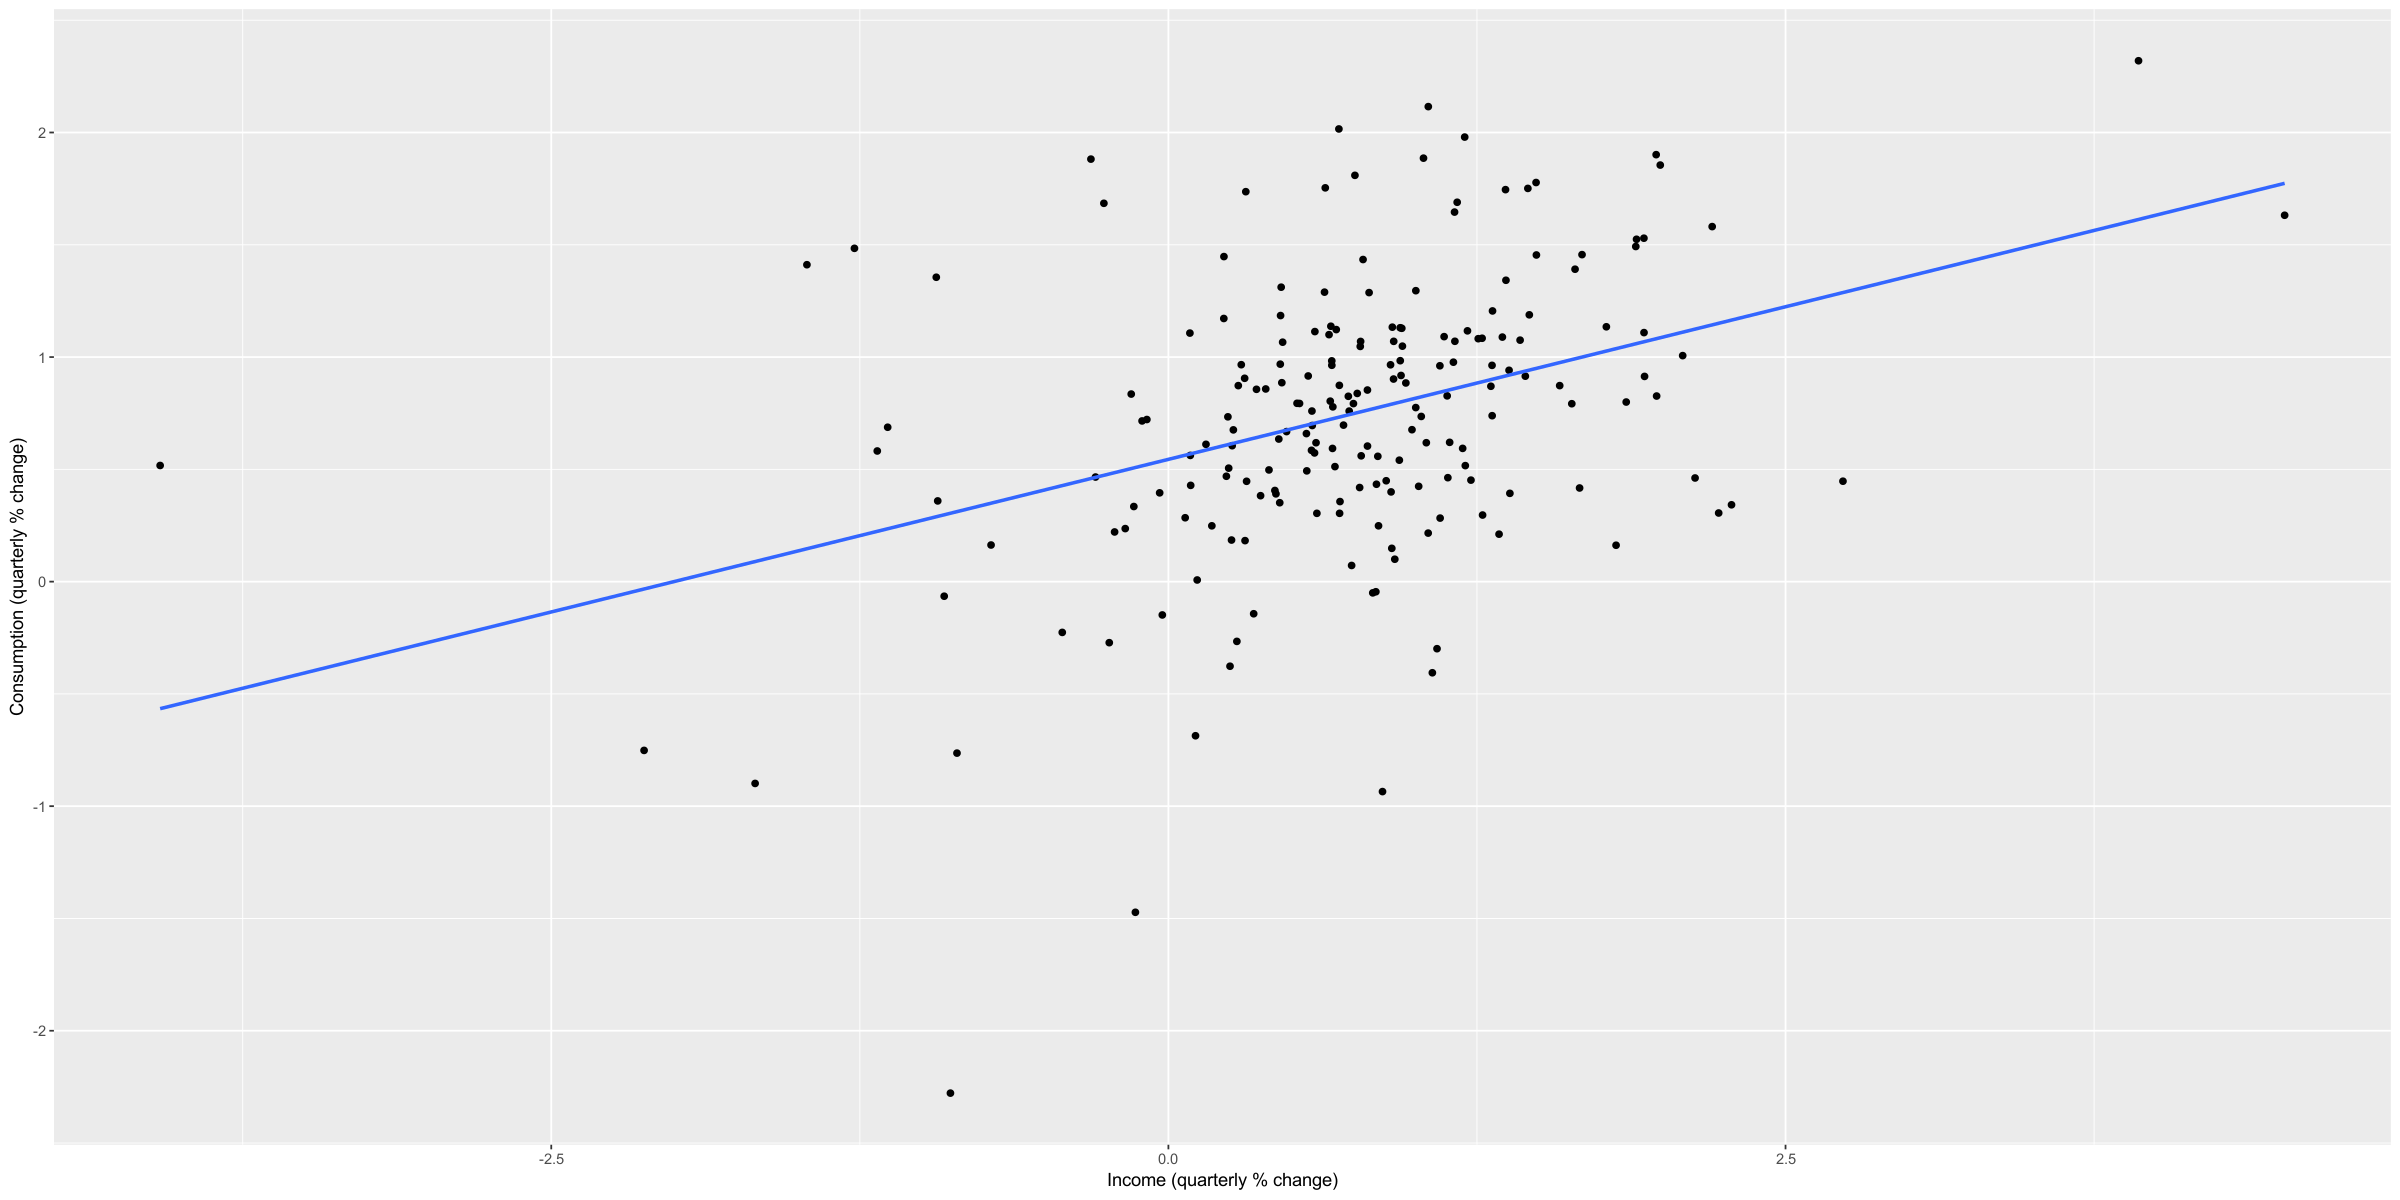

In [5]:
# A scatter plot of consumption changes against income changes is shown in the above figure along with the estimated regression line


us_change |> ggplot(aes(x = Income, y = Consumption)) + labs(y = "Consumption (quarterly % change)", x = "Income (quarterly % change)") + geom_point() + geom_smooth(method = "lm", se=FALSE)

In [6]:
# The equation is estimated using the TSLM() function:

us_change |> model(TSLM(Consumption ~ Income)) |> report()

Series: Consumption 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-2.58236 -0.27777  0.01862  0.32330  1.42229 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.54454    0.05403  10.079  < 2e-16 ***
Income       0.27183    0.04673   5.817  2.4e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5905 on 196 degrees of freedom
Multiple R-squared: 0.1472,	Adjusted R-squared: 0.1429
F-statistic: 33.84 on 1 and 196 DF, p-value: 2.4022e-08


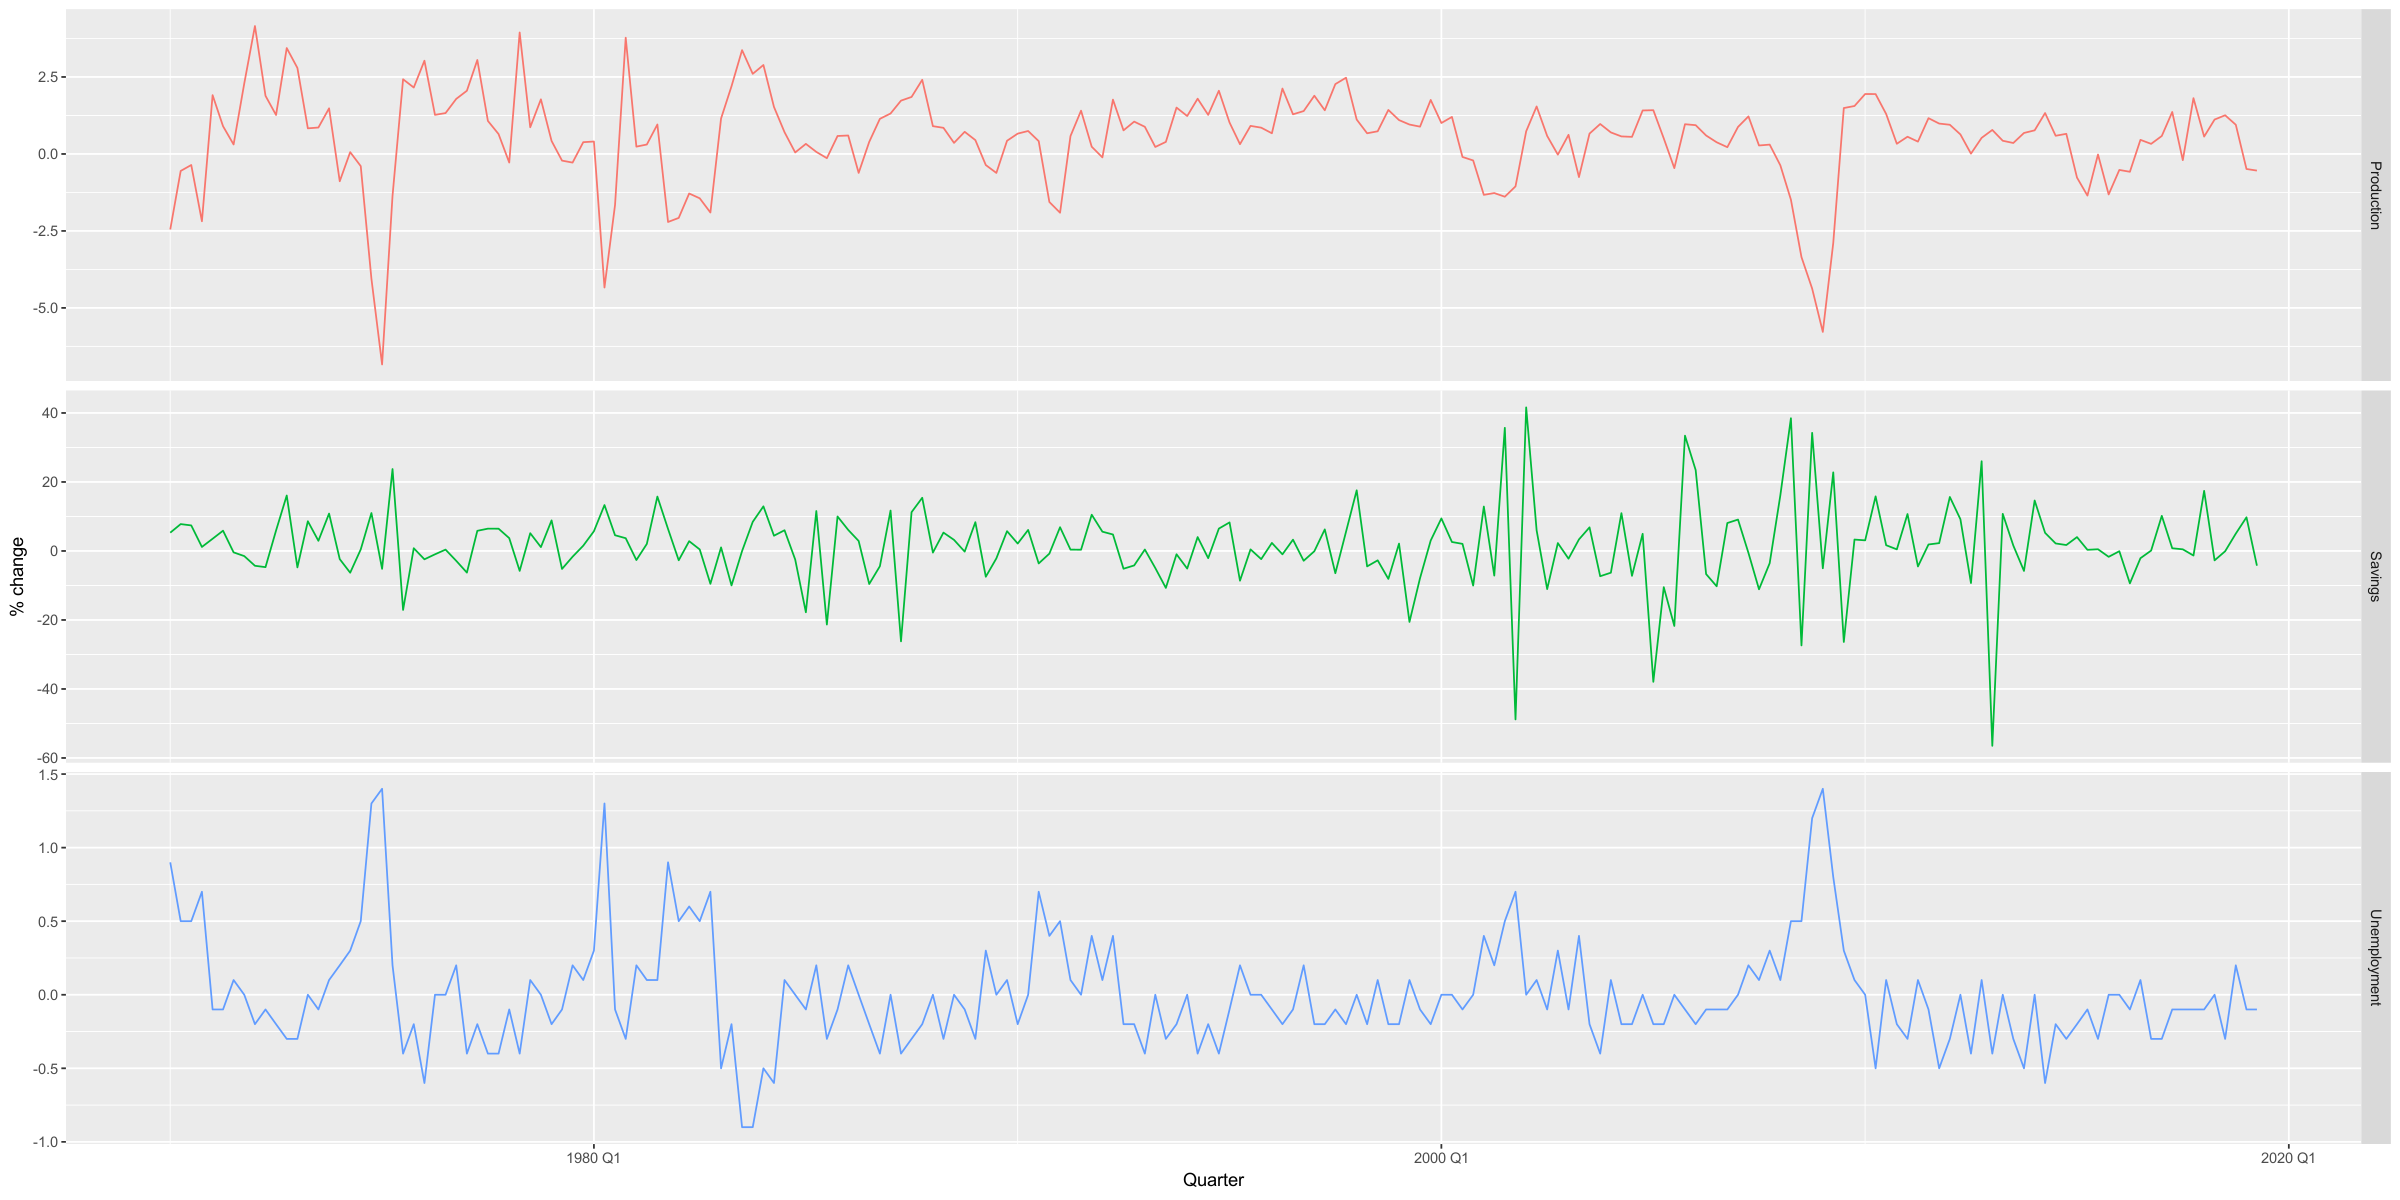

In [7]:
## Example: US consumption expenditure

## the following graph additional predictores that may be useful for forecasting US consumption expenditure. These are quarterly percentage changes in industrial production and personal savings, and quarterly changes in the unemployment rate. Building a multiple linear regression model can potentially generate mroe accurate forecasts as we expect consumption expenditure to not only depend on personal income but on other predictores as well

us_change |>
select(-Consumption, -Income) |>
pivot_longer(-Quarter)|>
ggplot(aes(Quarter, value, colour = name)) +
geom_line() +
facet_grid(name ~ ., scales = "free_y") +
guides(colour = "none") +
labs(y = "% change")

In [10]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



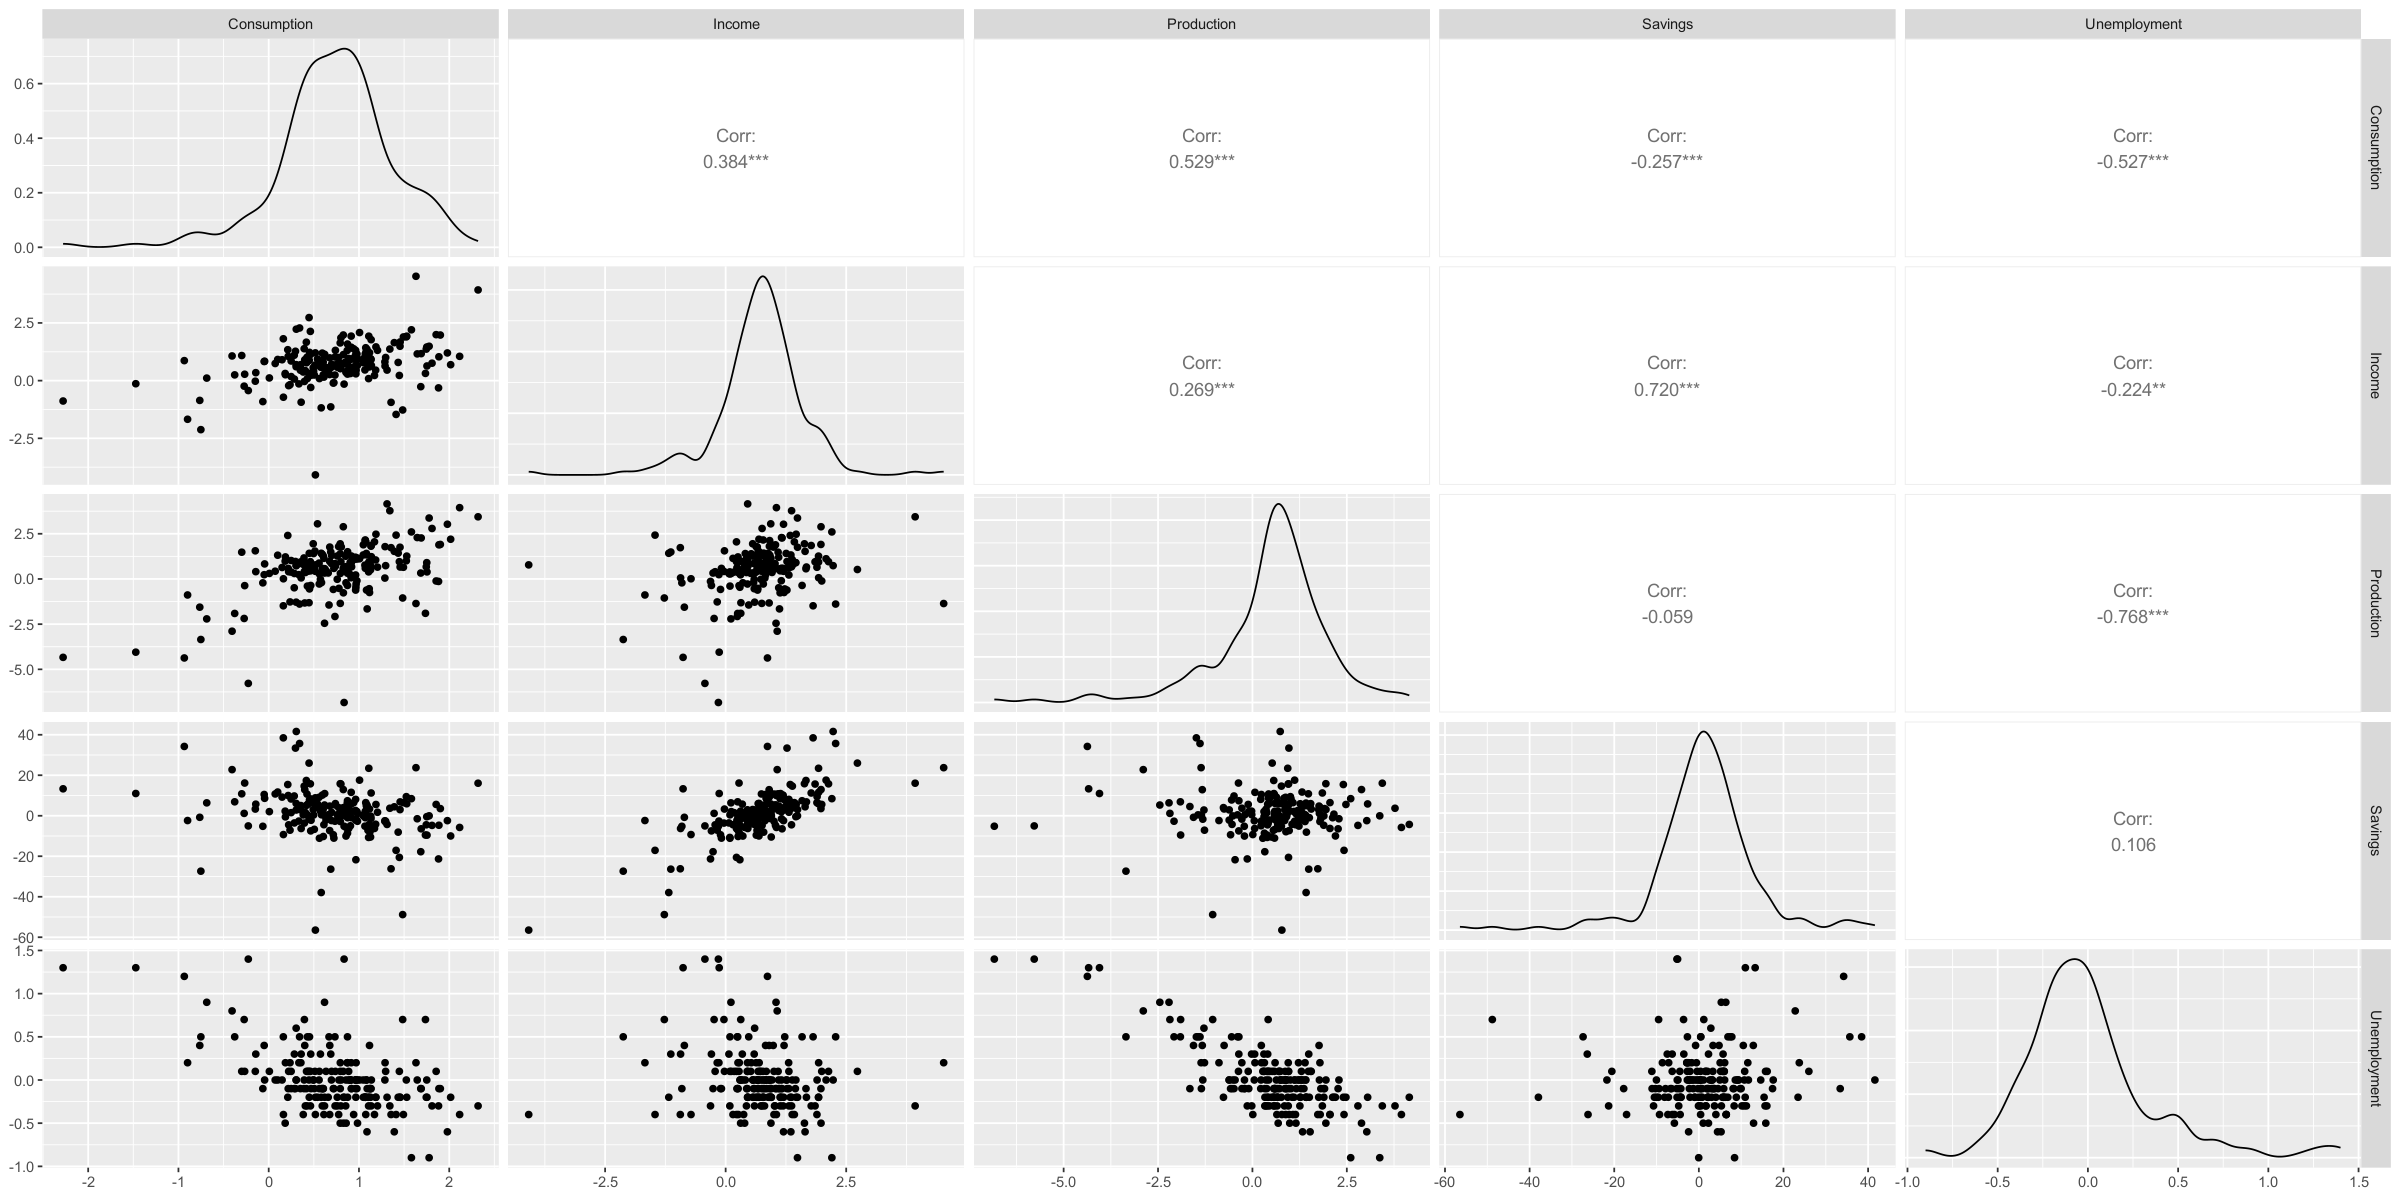

In [11]:
# The figure below is a scatterplot of five variables. The first column shows the relationships between the forecast variable and each of the predictors. The scatterplots show positive relationships with income and industrial production, and negative relatioships with savings and unemployment. The strength of these relatioships are shown by the ocrrelation coefficients across the first row. The remaining scatterplots and correlation coefficients show the relationships between the predictors


us_change |> GGally::ggpairs(columns = 2:6)